<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

# Replicating lesson code

In [2]:
### Loading the file

!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip


--2019-10-02 03:33:38--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   892KB/s    in 25s     

2019-10-02 03:34:09 (882 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]



In [3]:
### Unziping the file

!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [4]:
### Initial inspection

!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load lending club data

In [0]:
import pandas as pd

pd.options.display.max_rows = 20
pd.options.display.max_columns = 100

In [6]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,

### Checking for columns with all null and dropping

In [7]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128345
hardship_type                                 128343
hardship_last_payment_amount                  128343
hardship_payoff_balance_amount                128343
hardship_reason                               128343
hardship_loan_status                          128343
                                               ...  
open_rv_12m                                        0
open_rv_24m                                        0
max_bal_bc                                         0
total_rev_hi_lim                                   0
total_cu_tl                                        0
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                      

In [8]:
df = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)
df.head()
df.isnull().sum().sort_values(ascending=False)

orig_projected_additional_accrued_interest    128345
hardship_loan_status                          128343
hardship_dpd                                  128343
hardship_reason                               128343
hardship_status                               128343
deferral_term                                 128343
hardship_amount                               128343
hardship_start_date                           128343
hardship_end_date                             128343
payment_plan_start_date                       128343
                                               ...  
max_bal_bc                                         0
total_rev_hi_lim                                   0
inq_fi                                             0
total_cu_tl                                        0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
mo_sin_old_rev_tl_op                          

#### Work with strings

In [0]:
### Defining a function to cast int_rate from str to float

def int_rate_to_float(mystring):
  return float(mystring.strip().strip('%'))/100

In [10]:
### Apply the function to the column

df['int_rate'] = df['int_rate'].apply(int_rate_to_float)

df['int_rate'].head()

0    0.1447
1    0.1614
2    0.1131
3    0.1298
4    0.1298
Name: int_rate, dtype: float64

#### Clean employment title

In [11]:
### View the top 20 titles

df['emp_title'].value_counts(dropna=False, ascending=False)[:20]

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [12]:
### Check unique values

len(df['emp_title'].value_counts())

43892

In [13]:
### Check top values

df['emp_title'].value_counts().reset_index().head()

,index,emp_title
0,Teacher,2090
1,Manager,1773
2,Registered Nurse,952
3,Driver,924
4,RN,726


In [14]:
import numpy as np

### Define a function to clean the employment titles

examples = ['owner', 'SuperVisor', 'project Manager', np.NaN]

def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"

### Check with list comprehensions 

[clean_title(item) for item in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [15]:
df['emp_title'] = df['emp_title'].apply(clean_title)

df['emp_title'].head()

0                          Bus Driver
1                  Production Manager
2                 Compliance Director
3           Program Support Assistant
4    Sr. Vice President -Risk Manager
Name: emp_title, dtype: object

In [16]:
### Check to see its effect on the DF

len(df['emp_title'].value_counts())

34902

In [17]:
### Create employee title manager

df['emp_title_manager'] = df['emp_title'].str.contains("Manager")
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,20000,20000,20000.0,36 months,0.1447,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,25000,25000,25000.0,60 months,0.1614,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
2,26500,26500,26500.0,60 months,0.1131,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,10400,10400,10400.0,36 months,0.1298,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
4,35000,35000,35000.0,60 months,0.1298,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt cons

#### DataFrame filtering

In [18]:
condition = (df['emp_title_manager'] == True)

managers = df[df['emp_title_manager'] == True]

managers.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
1,25000,25000,25000.0,60 months,0.1614,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
4,35000,35000,35000.0,60 months,0.1298,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,0.0,Apr-2019,34712.60,NaN,Sep-2019,0,NaN,1,Joint App,272421.0,...,9,19,8,13,0.0,0,0,1,97.4,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
8,12000,12000,12000.0,36 months,0.1180,397.43,B,B4,Transportation Manager,10+ years,RENT,79365.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,104xx,NY,29.70,0,Sep-1988,2,25.0,NaN,20,0,4957,27.8%,32,w,9383.91,9383.91,3565.070000,3565.07,2616.09,948.98,0.0,0.0,0.0,Sep-2019,397.43,Oct-2019,Sep-2019,0,35.0,1,Individual,NaN,...,12,20,11,20,0.0,0,0,7,81.3,0.0,0,0,103047,80734,6700,85247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
16,12000,12000,12000.0,36 months,0.1614,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9844.05,9844.05,3365.620000,3365.62,2155.95,1209.67,0.0,0.0,0.0,Sep-2019,422.72,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,5,4,6,0.0,0,0,2,100.0,66.7,0,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
18,20400,20400,20400.0,60 months,0.1033,436.76,B,B1,Bakery Manager,10+ years,MORTGAGE,140000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation

In [19]:
(df['emp_title_manager'] == False) & (df['home_ownership']=="OWN")

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
          ...  
128402    False
128403     True
128404    False
128405    False
128406    False
128407    False
128408    False
128409    False
128410    False
128411    False
Length: 128412, dtype: bool

In [20]:
plebians = df[(df['emp_title_manager'] == False) & (df['home_ownership']=="MORTGAGE")]
print(plebians.shape)
plebians.head()

(53930, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
2,26500,26500,26500.0,60 months,0.1131,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,10400,10400,10400.0,36 months,0.1298,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
5,20000,20000,20000.0,36 months,0.0756,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0,Feb-1999,0,48.0,NaN,9,0,25416,29.9%,19,w,0.00,0.00,20215.792430,20215.79,20000.00,215.79,0.0,0.0,0.0,Feb-2019,20228.39,NaN,Feb-2019,0,NaN,1,Joint App,190000.0,...,5,9,5,9,0.0,0,0,1,94.7,20.0,0,0,622183,71569,85100,74833,43287.0,Aug-1998,0.0,3.0,10.0,29.7,2.0,7.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
6,13000,13000,13000.0,36 months,0.1797,469.79,D,D1,Help Tech Supervisor,10+ years,MORTGAGE,92360.0,Source Verified,Dec-2018,Current,n,home_improvement,Home improvement,300xx,GA,27.44,0,Sep-2006,1,68.0,NaN,18,0,32020,49.6%,30,w,10370.35,10370.35,4208.640000,4208.64,2629.65,1578.99,0.0,0.0,0.0,Sep-2019,469.79,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,15,22,12,18,0.0,0,0,1,90.0,66.7,0,0,190803,49330,24400,28861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
11,7000,7000,6975.0,36 months,0.1072,228.25,B,B2,Business Analyst,< 1 year,MORTGAGE,97000.0,Source Verified,Dec-2018,Fully Paid,n,other,Other,201xx,VA

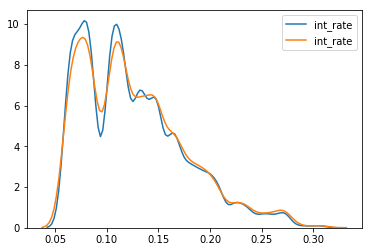

In [21]:
### Graphing the difference in interest rates among the subsets 

import seaborn as sns

sns.kdeplot(plebians['int_rate'])
sns.kdeplot(managers['int_rate']);

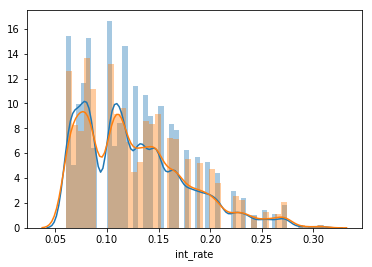

In [22]:
sns.distplot(plebians['int_rate'])
sns.distplot(managers['int_rate']);

### Working with dates

In [23]:
### casting the issue_d column to DateTime

df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df['issue_d'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [0]:
# Casting the other datetime columns to type DateTime

df['issue_year'] = df["issue_d"].dt.year
df['issue_month'] = df["issue_d"].dt.month
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], 
                                        infer_datetime_format=True)

### Creating a feature to show amount of days since earliest credit line





In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d']
                                            - df['earliest_cr_line']).dt.days

# Assignment Portion

### Create the column loan_status_is_great

In [26]:
### Examining the loan_status column

df['loan_status'].value_counts(ascending=False)

Current               105925
Fully Paid             15780
Charged Off             2863
Late (31-120 days)      2482
In Grace Period          901
Late (16-30 days)        459
Default                    2
Name: loan_status, dtype: int64

In [27]:
### Creating the column

df['loan_status_is_great'] = df['loan_status'].str.contains("Current") | df['loan_status'].str.contains("Fully Paid")

df['loan_status_is_great'].head()

### Further examination

df['loan_status_is_great'].value_counts()




True     121705
False      6707
Name: loan_status_is_great, dtype: int64

In [28]:
df['loan_status_is_great'].dtypes

dtype('bool')

In [29]:
### Casting bool to 1 and 0

df['loan_status_is_great'] = (df['loan_status_is_great']).astype(int )

df['loan_status_is_great'].value_counts()

1    121705
0      6707
Name: loan_status_is_great, dtype: int64

### Make last_pymnt_d_month and last_pymnt_d_year columns.

In [30]:
### Casting the last_pymnt_d to DateTime type

df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],
                                    infer_datetime_format=True)

### Checking

df['last_pymnt_d'].head()

0   2019-09-01
1   2019-04-01
2   2019-09-01
3   2019-09-01
4   2019-04-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [0]:
### Creating the requested features

df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month

df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year




In [32]:
### Checking

df['last_pymnt_d_month'].head()

0    9.0
1    4.0
2    9.0
3    9.0
4    4.0
Name: last_pymnt_d_month, dtype: float64

In [33]:
df['last_pymnt_d_year'].head()

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d_year, dtype: float64

### Convert the term column from string to integer.

In [34]:
df['term'].value_counts()

 36 months    88179
 60 months    40233
Name: term, dtype: int64

In [35]:
df['term'].dtypes

dtype('O')

In [36]:
### Defining a function to cast to int

### Example for testing
example_terms = ['36 months', '60 months']

def term_to_int(term):
  if isinstance(term, str):
    return int(term.strip('months').strip())
  else:
    return "Unknown"

### Checking to see function works

[term_to_int(item) for item in example_terms]

[36, 60]

In [0]:
### Applying this function to the column 

# df['term'] = df['term'].apply(term_to_int)





In [0]:
### Checking 

# df['term'].head()

In [0]:
### OOPS

uh_oh_df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')



In [0]:
df['term'] = uh_oh_df['term']

In [40]:
df['term'].value_counts()

 36 months    88179
 60 months    40233
Name: term, dtype: int64

In [0]:
### Back to where we started

df['term'] = df['term'].apply(term_to_int)

In [42]:
df['term'].value_counts()

36    88179
60    40233
Name: term, dtype: int64

In [43]:
df['term'].dtypes

dtype('int64')

In [0]:
### What happened here is that I wasn't segregating my code adequately and when
# I went to check the dtypes originally it existed in the same cell where
# the function was applied and since the function returns unknown for non str 
# values on its second loop all values being int were changed to unknown 
# breaking the column

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

# Lending Club Options

- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the emp_title column to replace titles with 'Other' if the title is not in the top 20.
- Take initiatve and work on your own ideas!

### There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values

In [0]:
df.head()

In [49]:
df['revol_util'].head()

0      73%
1    36.8%
2    65.4%
3     9.8%
4    74.9%
Name: revol_util, dtype: object

In [52]:
df['revol_util'].value_counts()

0%        1132
43%        225
49%        222
39.1%      220
32%        217
32.9%      216
28%        214
37.5%      213
44%        212
33.8%      211
          ... 
101.9%       1
113.3%       1
103.7%       1
104.4%       1
123.8%       1
121%         1
183.8%       1
103.9%       1
116.3%       1
106.3%       1
Name: revol_util, Length: 1074, dtype: int64

In [54]:
df['revol_util'].isnull().value_counts()

False    128256
True        156
Name: revol_util, dtype: int64

In [55]:
df['revol_util'].dtypes

dtype('O')

In [59]:
### Creating test variables

revol_util_examples = ['5%', '10%', np.NaN ]

### Defining the function

def revol_util_to_float(revol):
  if isinstance(revol, str):
    return float(revol.strip('%').strip())/100
  else:
    return np.NaN

[revol_util_to_float(item) for item in revol_util_examples]

[0.05, 0.1, nan]

In [0]:
### Applying to the column

df['revol_util'] = df['revol_util'].apply(revol_util_to_float)

In [62]:
### Checking

df['revol_util'].value_counts()

0.000    1132
0.430     225
0.490     222
0.391     220
0.320     217
0.329     216
0.280     214
0.375     213
0.440     212
0.330     211
         ... 
1.159       1
1.385       1
1.055       1
1.170       1
1.088       1
1.053       1
1.019       1
1.132       1
1.091       1
1.463       1
Name: revol_util, Length: 1074, dtype: int64

### Modify the emp_title column to replace titles with 'Other' if the title is not in the top 20.

In [64]:
df['emp_title'].value_counts()[:20]

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [70]:
### Cleaning the data further let's start with nurses

nurse_examples = ['Rn', 'Registered Nurse', 'Nurse', 'Shaman']

# Define a function to combine the professions into registered nurse

def combine_nurse_titles(title):
  if title == 'Rn' or title == 'Nurse':
    return 'Registered Nurse'
  else:
    return title
  

[combine_nurse_titles(item) for item in nurse_examples]


['Registered Nurse', 'Registered Nurse', 'Registered Nurse', 'Shaman']

In [0]:
### Applying it to the column

df['emp_title'] = df['emp_title'].apply(combine_nurse_titles)

In [72]:
df['emp_title'].value_counts()[:20]

Unknown                     20947
Registered Nurse             2677
Teacher                      2557
Manager                      2395
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Office Manager                805
Sales                         803
General Manager               791
Project Manager               720
Owner                         625
Director                      523
Operations Manager            518
Sales Manager                 500
Police Officer                440
Technician                    420
Engineer                      412
Administrative Assistant      409
Store Manager                 398
Name: emp_title, dtype: int64

In [75]:
### Create a list of the top 20 titles

top_titles = df['emp_title'].value_counts().index[:20].tolist()

print(top_titles)

['Unknown', 'Registered Nurse', 'Teacher', 'Manager', 'Driver', 'Supervisor', 'Truck Driver', 'Office Manager', 'Sales', 'General Manager', 'Project Manager', 'Owner', 'Director', 'Operations Manager', 'Sales Manager', 'Police Officer', 'Technician', 'Engineer', 'Administrative Assistant', 'Store Manager']


In [77]:
### defining the function to parse titles
title_examples = ['Registered Nurse', 'Unknown', 'Manager', 'Bank Robber',]

def not_tops_to_other(title):
  if title in top_titles:
    return title
  else:
    return 'Other'

[not_tops_to_other(item) for item in title_examples]

['Registered Nurse', 'Unknown', 'Manager', 'Other']

In [0]:
### Applying to the column

df['emp_title'] = df['emp_title'].apply(not_tops_to_other)

In [81]:
df['emp_title'].value_counts()[:20]

Other                       89134
Unknown                     20947
Registered Nurse             2677
Teacher                      2557
Manager                      2395
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Office Manager                805
Sales                         803
General Manager               791
Project Manager               720
Owner                         625
Director                      523
Operations Manager            518
Sales Manager                 500
Police Officer                440
Technician                    420
Engineer                      412
Administrative Assistant      409
Name: emp_title, dtype: int64